Import the modules that will be used.

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. O(n)
2. O(n^2)
3. O(n^3)

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [16]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


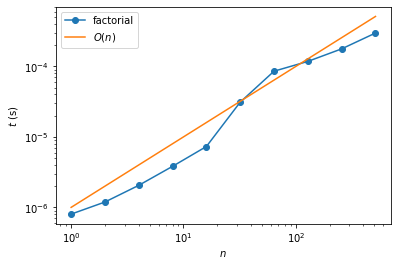

In [17]:
#Copied from tutorial page so don't fully understand it
N = 2**np.arange(0, 10)
#x = np.arange(N[-1])
times = []

for n in N:
    t = %timeit -q -n4 -r10 -o factorial(n)
    times.append(t.best)

plt.loglog(N, times, marker='o', label='factorial')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.loglog(N, 1e-6*N, label='$O(n)$')

plt.legend(loc=0)
plt.show()

#Is different every time? Why?

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [18]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [19]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [20]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)

def det(n):
  return np.linalg.det(np.random.rand(n, n))

#x = np.arange(N[-1])
times = []

for n in N:
  t = %timeit -q -n4 -r10 -o det(n)
  times.append(t.best)

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Plot result:

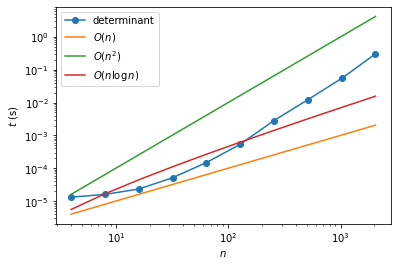

In [21]:
plt.loglog(N, times, marker='o', label='determinant')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')


plt.loglog(N, 1e-6*N, label='$O(n)$')
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')
plt.loglog(N, 1e-6*N*np.log(N), label='$O(n\log\, n)$')

plt.legend(loc=0)
plt.show()